In [34]:
import pandas as pd

df=pd.read_csv('E:\Student Pass Prediction — Decision Tree Classifier\StudentsPerformance.csv')
df['average score']=df[['math score','reading score','writing score']].mean(axis=1)
df['passed']=(df['average score']>=70).astype(int)

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8268\46765671.py:3: SyntaxWarning: invalid escape sequence '\S'
  df=pd.read_csv('E:\Student Pass Prediction — Decision Tree Classifier\StudentsPerformance.csv')


In [35]:
x=df[['math score','reading score','writing score']]
y=df['passed']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight=None,
    random_state=42

)
rf.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred=rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:, 1]

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

print("accuracy score: ",accuracy_score(y_test,y_pred))
print("precision score: ",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("f1 score: ",f1_score(y_test,y_pred))
print("roc auc score: ",roc_auc_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

accuracy score:  0.988
precision score:  0.981651376146789
recall score :  0.9907407407407407
f1 score:  0.9861751152073732
roc auc score:  0.9883281168492437
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.98      0.99      0.99       108

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[140   2]
 [  1 107]]


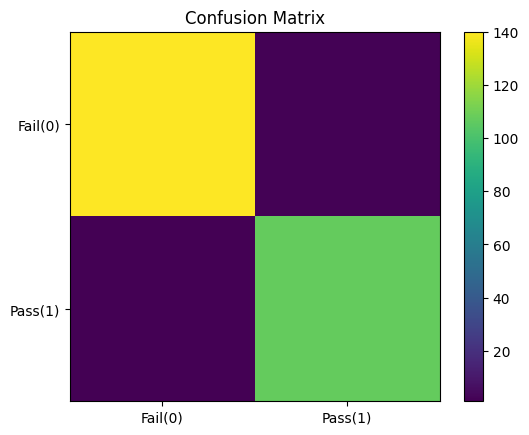

In [39]:
import matplotlib.pyplot as plt

plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Fail(0)", "Pass(1)"])
plt.yticks([0,1], ["Fail(0)", "Pass(1)"])
plt.show()

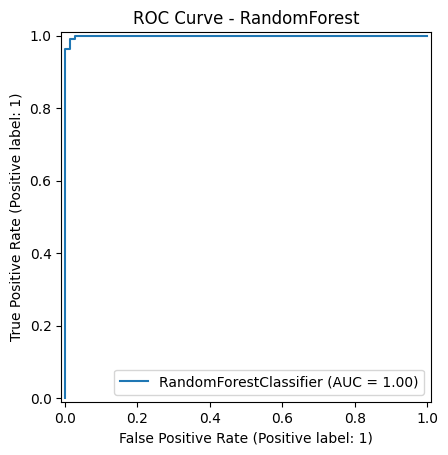

In [40]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, x_test, y_test)
plt.title("ROC Curve - RandomForest")
plt.show()